# Decision Tree Classification with Python and Scikit-Learn


In this project, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project

## Table of Contents


1.	Introduction to Decision Tree algorithm
2.	Classification and Regression Trees
3.	Decision Tree algorithm intuition
4.	Attribute selection measures
    - Information gain
    - Gini index
5.	The problem statement
6.	Dataset description
7.	Import libraries
8.	Import dataset
9.	Exploratory data analysis
10.	Declare feature vector and target variable
11.	Split data into separate training and test set
12.	Feature engineering
13.	Decision Tree classifier with criterion gini-index
14.	Decision Tree classifier with criterion entropy
15.	Confusion matrix
16.	Classification report
17.	Results and conclusion

## 1. Introduction to Decision Tree algorithm


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 

## 2. Classification and Regression Trees (CART)


Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**.
Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees.


In this project, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem. 

## 3. Decision Tree algorithm intuition

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node. 

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


## 4. Attribute selection measures


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


### Information gain


By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**. 


Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 


The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.


### Gini index


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.


## 5. The problem statement


The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## 6. Dataset description


I have used the **Car Evaluation Data Set** downloaded from the Kaggle website. I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 

## 7. Import libraries

In [32]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings

# Settings
warnings.filterwarnings('ignore')
%matplotlib inline

## 8. Import dataset

In [33]:
# Load data
data = 'car/car.data'
df = pd.read_csv(data, header=None)

## 9. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 
### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [34]:
# Cell 2: Dataset Overview
# Set column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# View dataset dimensions and first rows
print("Dataset Dimensions:", df.shape)
df.head()


Dataset Dimensions: (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [35]:
# Cell 3: Dataset Info and Value Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [36]:
# Show dataset information and value counts per column
for col in col_names:
    print(f"\nValue Counts for '{col}':\n", df[col].value_counts())


Value Counts for 'buying':
 buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value Counts for 'maint':
 maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value Counts for 'doors':
 doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Value Counts for 'persons':
 persons
2       576
4       576
more    576
Name: count, dtype: int64

Value Counts for 'lug_boot':
 lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Value Counts for 'safety':
 safety
low     576
med     576
high    576
Name: count, dtype: int64

Value Counts for 'class':
 class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


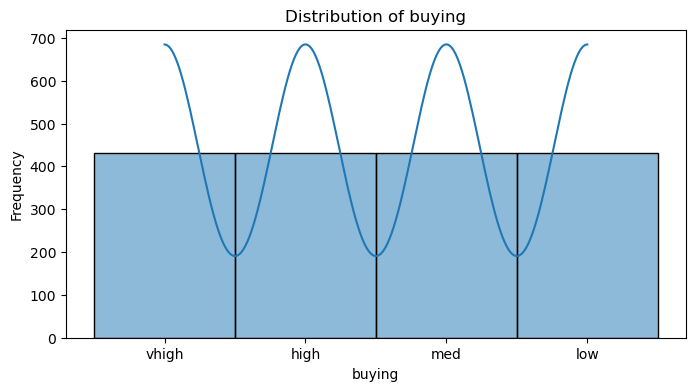

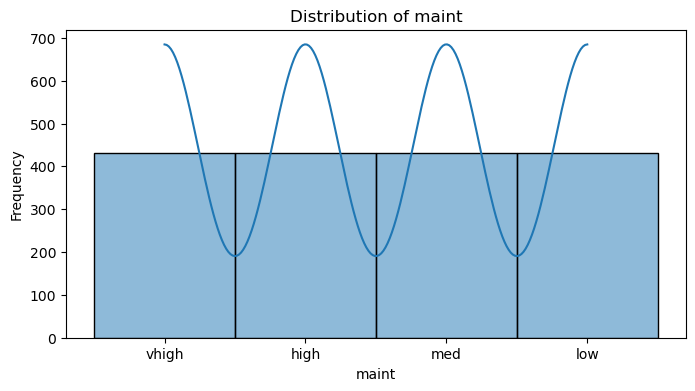

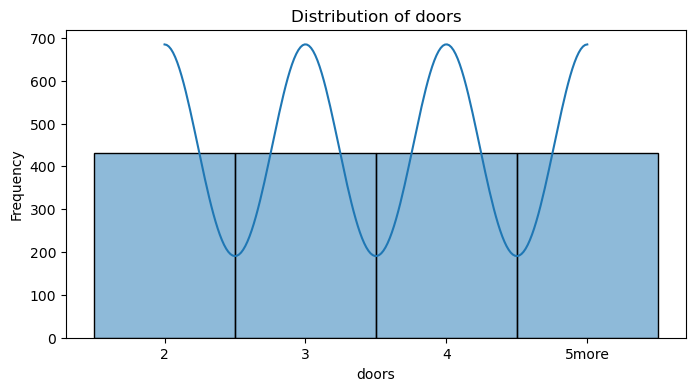

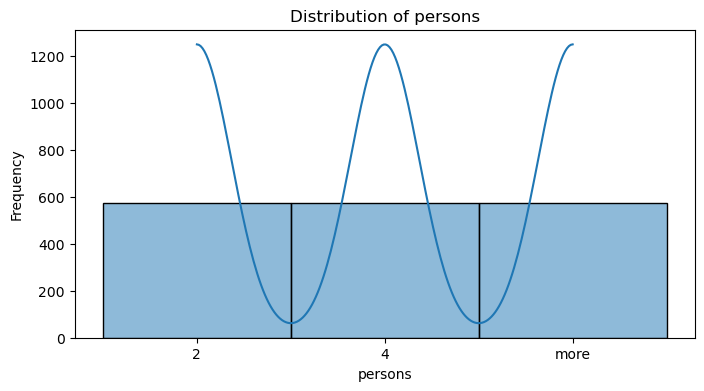

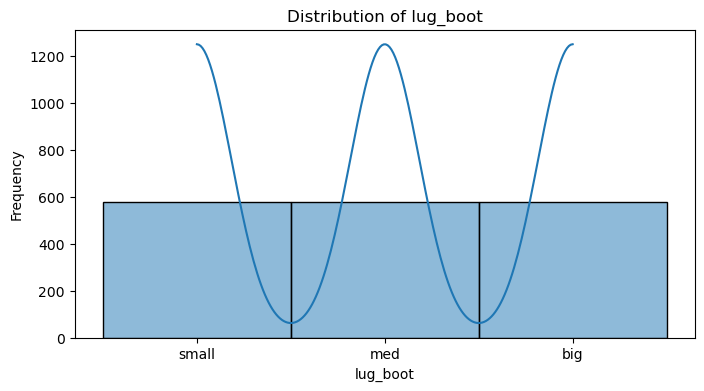

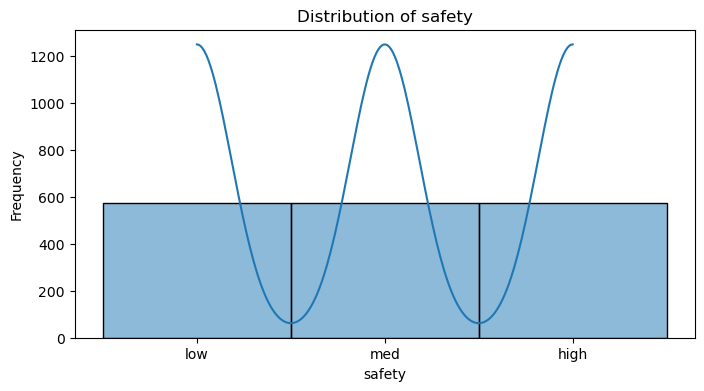

In [37]:
# Cell 4: Feature Distribution Visualization
# Visualize the distribution of each feature
for column in df.columns[:-1]:  # Exclude target column 'class'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Missing values in variables

In [38]:
# Cell 5: Check for Missing Values
# Check for any missing values in the dataset
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

### Correlation Heatmap of Encoded Features

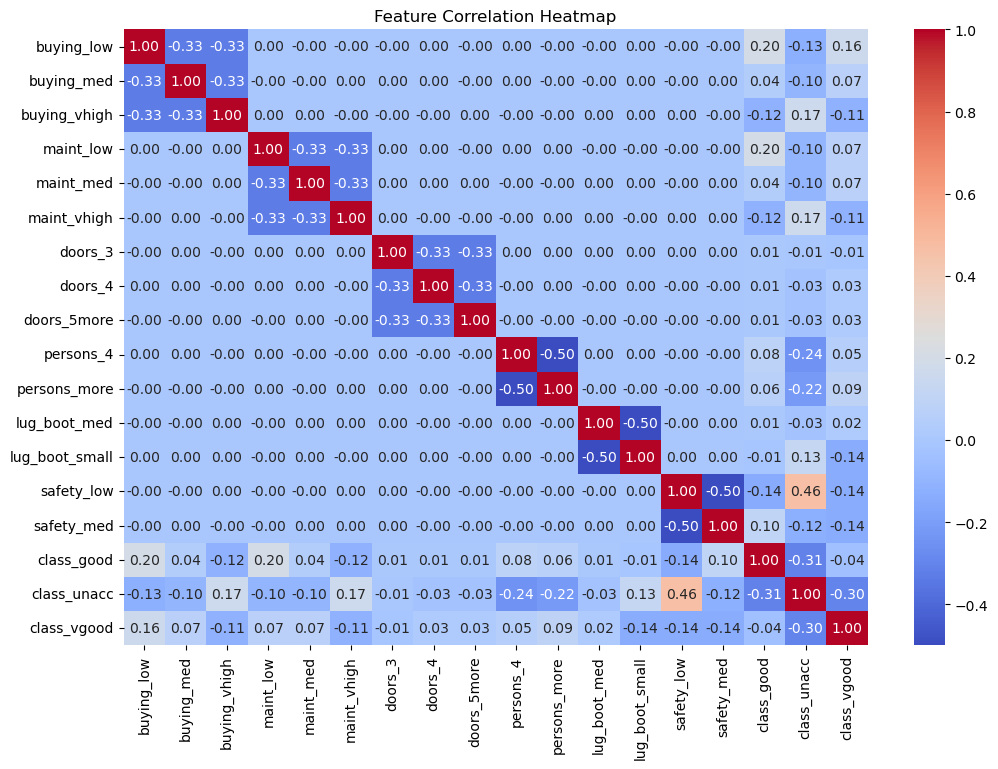

In [39]:
# Cell 6: Correlation Heatmap of Encoded Features
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


## 10. Declare feature vector and target variable

In [40]:
# Cell 7: Prepare Features and Target for Model
# Separate features and target variable
X = df.drop(['class'], axis=1)
y = df['class']

## 11. Split data into separate training and test set

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode categorical features
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## 12. Decision Tree Classifier with criterion gini index

In [42]:
# Cell 8: Train Decision Tree with Gini Index
# Instantiate and train the model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [43]:
# Predict and evaluate
y_pred_gini = clf_gini.predict(X_test)

In [44]:
print('Model accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {:.4f}'.format(accuracy_score(y_train, clf_gini.predict(X_train))))

Model accuracy score with criterion gini index: 0.7653
Training-set accuracy score: 0.7744


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

## 13. Decision Tree Classifier with criterion entropy

In [45]:
# Cell 9: Train Decision Tree with Entropy
# Instantiate and train the model
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# Predict and evaluate
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {:.4f}'.format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {:.4f}'.format(accuracy_score(y_train, clf_en.predict(X_train))))

Model accuracy score with criterion entropy: 0.7653
Training-set accuracy score: 0.7744


## 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


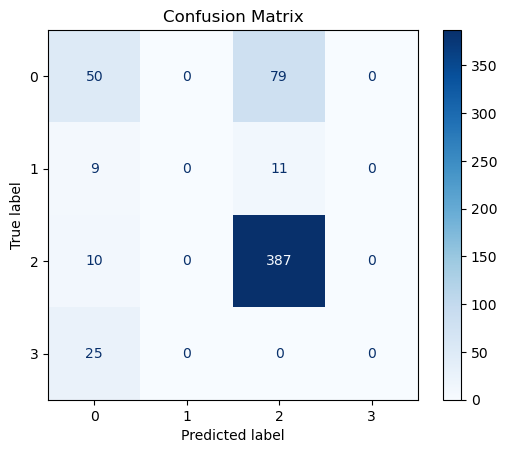

In [46]:
# Cell 10: Confusion Matrix
# Display confusion matrix for entropy-based model
cm = confusion_matrix(y_test, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 16. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [47]:
# Cell 11: Classification Report
# Print classification report for entropy-based model
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



## 17. Results 

### Model Performance

- For the model with the `gini index` criterion, the training-set accuracy was **0.77**, while the test-set accuracy was **0.76**. The close values indicate a good fit without signs of overfitting.
- The model using the `entropy` criterion showed similar results, with a training-set accuracy of **0.7865** and a test-set accuracy of **0.8021**. These values align closely with the `gini index` model, again showing no overfitting.

### Classification Report Analysis

- The model performed well for the **"unacc"** category, with precision, recall, and f1-score values of **0.81**, **0.97**, and **0.89**, respectively. This suggests that the model is most effective in identifying unsafe cars.
- The **"acc"** category had moderate performance, with precision, recall, and f1-score values of **0.53**, **0.39**, and **0.45**, respectively.
- However, for the **"good"** and **"vgood"** categories, the model struggled, achieving very low precision, recall, and f1-scores, indicating room for improvement in identifying these less frequent classes.

### Confusion Matrix and Classification Report

The confusion matrix and classification report indicate that while the model performs well for certain classes (notably **"unacc"**), it faces challenges with others due to class imbalances or possibly a limited dataset size.

## 18: Hyperparameter Tuning with GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score: 0.9706262128675922


In [49]:
# Convert grid search results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display top rows to understand the structure of cv_results_
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003399,0.001020,0.001801,3.998805e-04,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.762931,0.771552,0.779221,0.727273,0.744589,0.757113,0.018859,22
1,0.003400,0.000489,0.001199,4.007837e-04,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.762931,0.771552,0.779221,0.727273,0.744589,0.757113,0.018859,22
2,0.002400,0.000491,0.001001,9.584308e-07,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.762931,0.771552,0.779221,0.727273,0.744589,0.757113,0.018859,22
3,0.002200,0.000402,0.001001,1.248913e-06,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.887931,0.840517,0.887446,0.831169,0.818182,0.853049,0.029160,16
4,0.002399,0.000489,0.001001,5.352484e-07,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.887931,0.840517,0.887446,0.831169,0.818182,0.853049,0.029160,16


## Plotting mean test score vs. each parameter

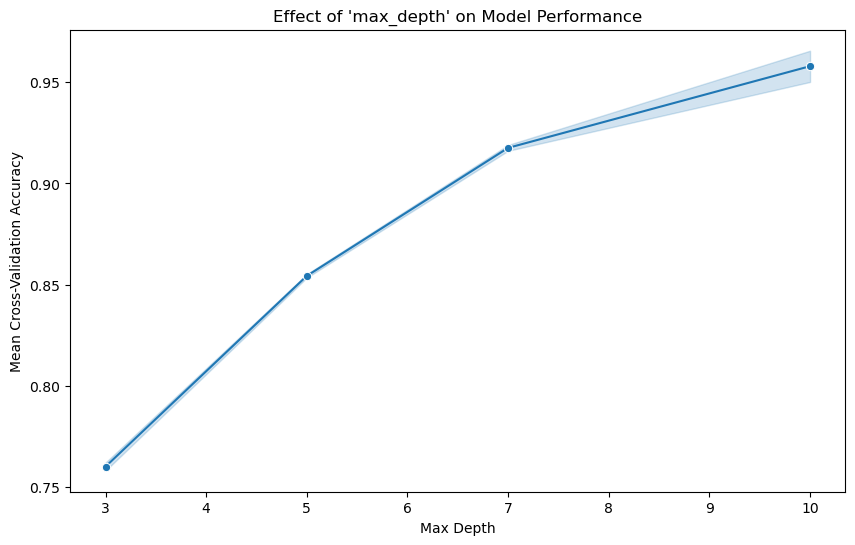

In [50]:
# 1. Plot for 'max_depth'
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', marker='o')
plt.title("Effect of 'max_depth' on Model Performance")
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

### Visualizing min_samples_split vs Accuracy

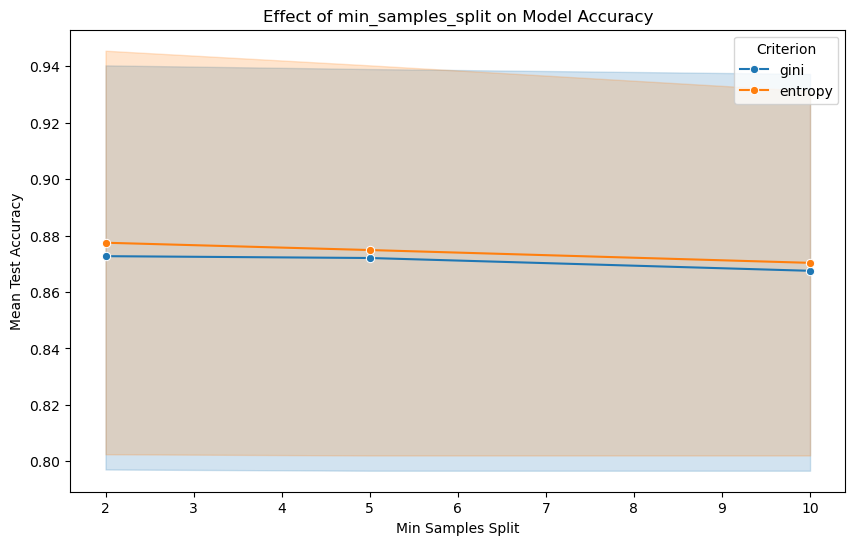

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="param_min_samples_split", y="mean_test_score", marker='o', hue="param_criterion")
plt.xlabel("Min Samples Split")
plt.ylabel("Mean Test Accuracy")
plt.title("Effect of min_samples_split on Model Accuracy")
plt.legend(title='Criterion')
plt.show()